In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d

In [7]:
data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/2_15_23/2023_02_15_10_25_36_775L24.npy',allow_pickle=True).tolist()
t = np.array(data['nT'])[:,1] # scan time
detuning = np.array(data['nT'])[:,3] # detuning
rabi = np.array(data['nT'])[:,2] # Rabi
E = np.array(data['E']) # energy for the lowest three states
overlap = np.array(data['overlap'])# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
random_U = np.array(data['params']['random_U'])/2/np.pi
print(random_U)

[21.63  9.32 11.8  17.2   6.72 20.37 11.47 21.82  7.58 16.76 12.73  7.94
 21.16 19.71  7.82 10.66 12.23 23.68 12.24 11.97 12.33 14.74  6.53 23.37]


Text(0, 0.5, 'Overlap <Ground state|evolve state>')

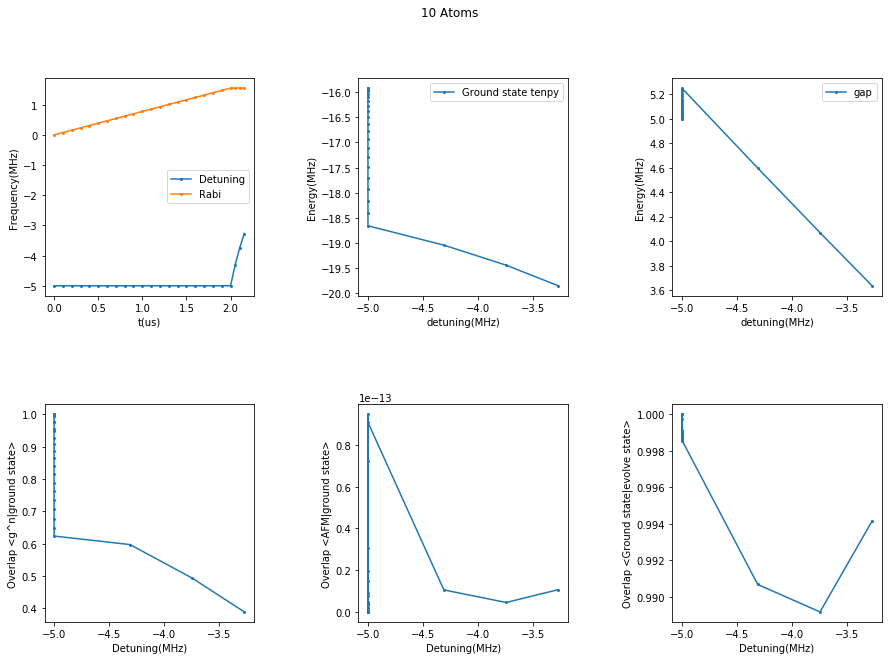

In [8]:
ms = 2
ls = '-'
fig, ax = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('10 Atoms')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,0].plot(t,detuning,marker='o',markersize = ms,ls = ls,label = 'Detuning')
ax[0,0].plot(t,rabi,marker='o',markersize = ms,ls = ls,label = 'Rabi')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
ax[0,0].legend()

ax[0,1].plot(detuning,(E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'Ground state tenpy')
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].legend()

ax[0,2].plot(detuning,(E[:,2]-E[:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= 'gap')
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')

ax[0,2].legend()

ax[1,0].plot(detuning,overlap[:,0],marker='o',markersize = ms,ls = ls)
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|ground state>')

ax[1,1].plot(detuning,overlap[:,1],marker='o',markersize = ms,ls = ls)
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|ground state>')

ax[1,2].plot(detuning,overlap[:,2],marker='o',markersize = ms,ls = ls)
ax[1,2].set_xlabel('Detuning(MHz)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')